## We were tasked with analyzing customer reviews for a fake amusement park called Wisneyland. The goal was to identify the low hanging fruit and make a few recommendations.

# PART 1 - Performing Sentiment Analysis with Python (Vader)

In [ ]:
# Download the appropriate libraries/packages.
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Read the CSV file into a dataframe.
url = 'http://bit.ly/park-reviews'
df_reviews = pd.read_csv(url)
df_reviews.head()

,review
0,If you've ever been to Disneyland anywhere you...
1,Its been a while since d last time we visit HK...
2,Thanks God it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...
4,"the location is not in the city, took around 1..."


In [ ]:
df_reviews.shape

(29026, 1)

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29026 entries, 0 to 29025
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  29026 non-null  object
dtypes: object(1)
memory usage: 226.9+ KB


In [ ]:
# Generate a sentiment score for each review.
analyzer = SentimentIntensityAnalyzer()
df_reviews['Sentiment Scores'] = df_reviews['review'].apply(lambda review: analyzer.polarity_scores(review))
df_reviews.head()

,review,Sentiment Scores
0,If you've ever been to Disneyland anywhere you...,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp..."
1,Its been a while since d last time we visit HK...,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp..."
2,Thanks God it wasn t too hot or too humid wh...,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co..."
3,HK Disneyland is a great compact park. Unfortu...,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo..."
4,"the location is not in the city, took around 1...","{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."


The Positive, Negative, and Neutral scores represent the proportion of text that falls in these categories. All these should add up to 1.

The compound score is normalized between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence.

NOTE:  A lambda function is a small function containing a single expression. Lambda functions can also act as anonymous functions where they don’t require any name. These are very helpful when we have to perform small tasks with less code.

In [ ]:
# Extract the compound sentiment score.
df_reviews['Compound Score']  = df_reviews['Sentiment Scores'].apply(lambda score_dict: score_dict['compound'])
df_reviews.head()

,review,Sentiment Scores,Compound Score
0,If you've ever been to Disneyland anywhere you...,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.7069
1,Its been a while since d last time we visit HK...,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.9901
2,Thanks God it wasn t too hot or too humid wh...,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.9920
3,HK Disneyland is a great compact park. Unfortu...,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.8489
4,"the location is not in the city, took around 1...","{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.2846


In [ ]:
# Export the data back to a CSV file.
from google.colab import files
df_reviews.to_csv('reviews_with_sentiment.csv')
files.download('reviews_with_sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# PART 2 - Creating Word Clouds with Python

In [ ]:
# Import additional libraries that are needed.
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
# Join all the review data together into one string.
review_text = " ".join(review for review in df_reviews.review)

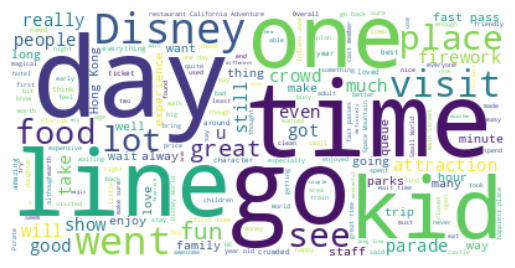

In [ ]:
# Create stopword list.
stopwords = set(STOPWORDS)
stopwords.update(["Disneyland", "park", "ride",'rides'])

# Generate a word cloud.
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(review_text)

# Display the generated image.
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Create a new dataframe with only the negative reviews.
df_reviews_negative = df_reviews[df_reviews['Compound Score'] < -0.5]
df_reviews_negative.head()

,review,Sentiment Scores,Compound Score
12,"We spend two days, the second day went early t...","{'neg': 0.12, 'neu': 0.856, 'pos': 0.024, 'com...",-0.7789
28,We visited here on a Wednesday. We arrived for...,"{'neg': 0.076, 'neu': 0.924, 'pos': 0.0, 'comp...",-0.5574
29,I need to say I have been to home of Disney...,"{'neg': 0.075, 'neu': 0.877, 'pos': 0.049, 'co...",-0.7364
71,During a recent stop over in Hong Kong we paid...,"{'neg': 0.09, 'neu': 0.875, 'pos': 0.035, 'com...",-0.7430
113,"Visited this theme park on 26.02.19. Overall, ...","{'neg': 0.151, 'neu': 0.764, 'pos': 0.085, 'co...",-0.8271


In [ ]:
# Join the negative review data together into one string.
review_text_negative = " ".join(review for review in df_reviews_negative.review)

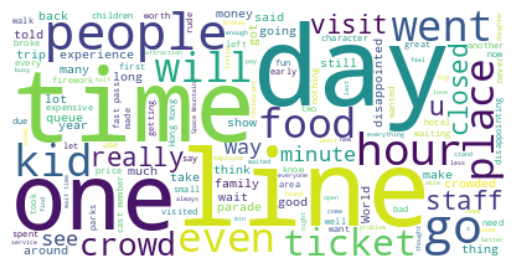

In [ ]:
# Create stopword list.
stopwords = set(STOPWORDS)
stopwords.update(["Disneyland", "park", "ride",'rides','Disney'])
# Generate a word cloud.
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(review_text_negative)

# Display the generated image.
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# PART 3 - More text processing.

In [ ]:
# Download packages in the NLTK.
nltk.download(['stopwords',
               'wordnet',
               'averaged_perceptron_tagger',
               'universal_tagset',
               'tagsets'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

We will tokenize the text to remove everything that isn't a word (punctuation) and then split the text into a list of words.

In [ ]:
# Create a tokenizer.
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenize the text.
tokens = tokenizer.tokenize(review_text_negative)

# Print out the first 8 words (tokens).
print(tokens[0:8])

['We', 'spend', 'two', 'days', 'the', 'second', 'day', 'went']


We will lowercase everything to treat it as the same word (e.g. tale or Tale).

In [ ]:
# Create a new list to hold the lowercased words.
lower_words = []

# Loop through the tokens and make them lower case.
for word in tokens:
    lower_words.append(word.lower())

# Printing out the first 8 words / tokens
print(lower_words[0:8])

['we', 'spend', 'two', 'days', 'the', 'second', 'day', 'went']


We will remove the stop words.

In [ ]:
# Get the English stop words from NLTK.
stop_words = nltk.corpus.stopwords.words('english')

# Create a new list to hold the book without stop words.
filtered_words = []

# Append to "filtered_words" all words that are in "lower_words" but not stop words.
for word in lower_words:
    if word not in stop_words:
        filtered_words.append(word)

# Print the first 5 filtered words to check that stop words have been removed.
print(filtered_words[0:8])

['spend', 'two', 'days', 'second', 'day', 'went', 'early', 'went']


We will normalize the lexicon -- i.e. reduce derivatives of a word to a common root (e.g. connection, connected, connecting).

In [ ]:
# Import the lemmatizer library.
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer.
lemmatizer = WordNetLemmatizer()

# Create a new list to hold the lemmed words.
lemmed_words = []

# Lemmatize each word and store it in our lemmed_words variable.
for word in filtered_words:
  lemmed_words.append(lemmatizer.lemmatize(word))

# Print the first 8 lemmatized words.
print(lemmed_words[0:8])

['spend', 'two', 'day', 'second', 'day', 'went', 'early', 'went']


Finally, we will calculate and plot the most frequent words.

In [ ]:
# Download the stopwords dataset if not already done
nltk.download('stopwords')

# Get the default list of English stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  # Convert to set

# Add custom words to the stop words list
custom_stop_words = {'disney', 'park', 'disneyland'}
stop_words.update(custom_stop_words)  # Use update for sets

# Create a new list to hold the book without stop words.
filtered_words = []

# Append to "filtered_words" all words that are in "lower_words" but not stop words.
for word in lower_words:
    if word not in stop_words:
        filtered_words.append(word)

# Print the first 8 filtered words to check that stop words have been removed.
print(filtered_words[0:8])

['spend', 'two', 'days', 'second', 'day', 'went', 'early', 'went']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# prompt: add stopwords to my frequency distribution

from nltk.probability import FreqDist



# Add your custom stopwords to the existing list
custom_stopwords = ['get', 'disney', 'one', 'also', 'could', 'really', 'disneyland', 'park', 'u', 'ride']  # Example stopwords
for word in custom_stopwords:
    if word in fdist:
        del fdist[word]


# Print the 10 most frequent words.
print(fdist.most_common(20))
freqdist = nltk.FreqDist(lemmed_words)


[('time', 1171), ('day', 1164), ('line', 955), ('go', 686), ('people', 676), ('would', 565), ('hour', 543), ('wait', 493), ('year', 475), ('place', 474), ('kid', 461), ('even', 437), ('went', 419), ('back', 417), ('long', 417), ('ticket', 409), ('many', 406), ('food', 402), ('crowd', 380), ('visit', 374)]


#Visualize word count on a lineplot.

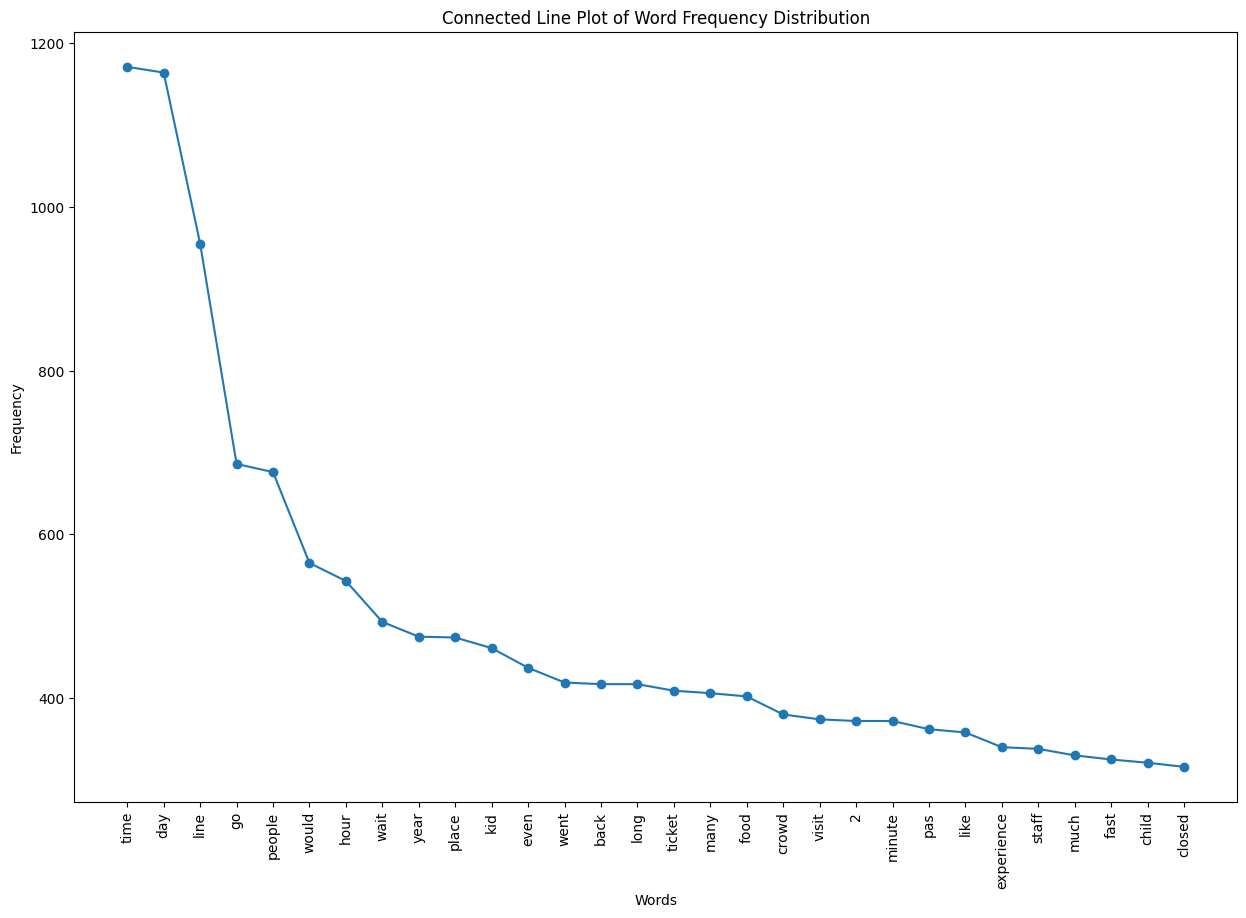

In [ ]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# Assuming `lemmed_words` contains your lemmatized list of words
freqdist = FreqDist(lemmed_words)

# Remove custom stopwords from frequency distribution
custom_stopwords = ['get', 'disney', 'one', 'also', 'could', 'really', 'disneyland', 'park', 'u', 'ride']
for word in custom_stopwords:
    if word in freqdist:
        del freqdist[word]

# Get the 30 most common words and their frequencies
most_common_words = freqdist.most_common(30)
words, frequencies = zip(*most_common_words)

# Plot a connected line plot
plt.figure(figsize=(15, 10))
plt.plot(words, frequencies, marker='o')
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Connected Line Plot of Word Frequency Distribution')
plt.show()